In [79]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance 
import sklearn.manifold
import sklearn.datasets
import sklearn.cluster
import umap
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Voy a manejar un dataset con imagenes correspondientes a dígitos en lenguaje de señas particionado en carpetas de
#acuerdo al dígito correspondiente
files_val = glob.glob('./Dataset/*/*.JPG')
datos=len(files_val)
siz=14
Data=np.zeros((datos,siz*siz))
target=np.zeros(datos)
count=0
images=[]
#Función para calcular el brillo
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale
#Leo los datos por carpetas y asigno el target correspondiente
for i in range(10):
    files_val = glob.glob('./Dataset/'+str(i)+'/*.JPG')
    for names in files_val:
        im=Image.open(names)
        out=(im.convert('L')).resize((siz,siz))
        #Aqui voy a incluir una parte para tratar de normalizar el brillo
        enhancer = ImageEnhance.Brightness(out)
        out=enhancer.enhance(0.9/calculate_brightness(out))
        images.append(out)
        Data[count,:]=(np.array(out).reshape((-1,1)).T).astype(float)
        target[count]=i
        count=count+1

In [80]:
#Dividimos los datos y estandarizamos
x_train,x_test,y_train,y_test,i_train,i_test= train_test_split(Data,target,images,train_size=0.5)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
#Probamos con las 3 capas de cuatro neuronas con softmax
mlp = sklearn.neural_network.MLPClassifier(activation='logistic',hidden_layer_sizes=((4,4,4)),max_iter=5000)

In [82]:
#Evaluamos para los diferentes tamaños del training
trainshape=x_train.shape[0]
testshape=x_test.shape[0]
scores=np.zeros((10,2))
for i in range(1,11):
    x_tr=x_train[:round(trainshape*i/10)]
    y_tr=y_train[:round(trainshape*i/10)]
    x_te=x_test[:round(testshape*i/10)]
    y_te=y_test[:round(testshape*i/10)]
    mlp.fit(x_tr,y_tr)
    scores[i-1,0]=sklearn.metrics.f1_score(y_tr, mlp.predict(x_tr), average='macro')
    scores[i-1,1]=sklearn.metrics.f1_score(y_te, mlp.predict(x_te), average='macro')

Text(0, 0.5, 'F1')

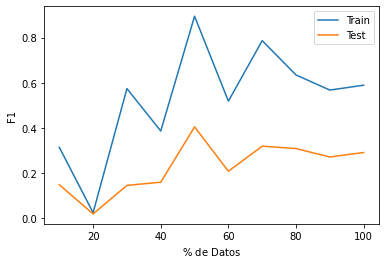

In [83]:
plt.plot(10*np.array(range(1,11)),scores[:,0])
plt.plot(10*np.array(range(1,11)),scores[:,1])
plt.legend(['Train','Test'])
plt.xlabel(r'$\%$ de Datos')
plt.ylabel('F1')

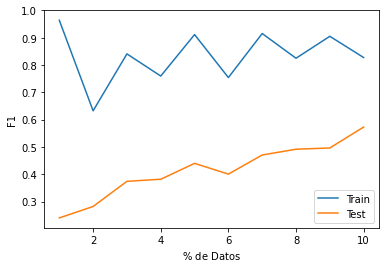

In [84]:
#Probamos con las 3 capas de cuatro neuronas ahora en relu
mlp = sklearn.neural_network.MLPClassifier(activation='relu',hidden_layer_sizes=((4,4,4)),max_iter=3500)
#Evaluamos para los diferentes tamaños del training
scorere=np.zeros((10,2))
for i in range(1,11):
    x_tr=x_train[:round(trainshape*i/10)]
    y_tr=y_train[:round(trainshape*i/10)]
    x_te=x_test[:round(testshape*i/10)]
    y_te=y_test[:round(testshape*i/10)]
    mlp.fit(x_tr,y_tr)
    scorere[i-1,0]=sklearn.metrics.f1_score(y_tr, mlp.predict(x_tr), average='macro')
    scorere[i-1,1]=sklearn.metrics.f1_score(y_te, mlp.predict(x_te), average='macro')
plt.plot(range(1,11),scorere[:,0])
plt.plot(range(1,11),scorere[:,1])
plt.xlabel(r'$\%$ de Datos')
plt.ylabel('F1')
plt.legend(['Train','Test'])

In [81]:
#Se obtiene un comportamiento mas estable que con softmax, aunque la precision para test sigue siendo baja

Text(0, 0.5, 'F1')

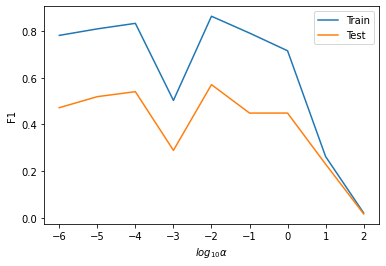

In [85]:
#Ahora variamos el parametro alpha
scorea=np.zeros((9,2))
for i in range(-6,3):
    alphav=10**i
    mlp = sklearn.neural_network.MLPClassifier(activation='relu',hidden_layer_sizes=((4,4,4)),max_iter=3500,alpha=alphav)
    mlp.fit(x_train,y_train)
    scorea[i+6,0]=sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro')
    scorea[i+6,1]=sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro')
plt.plot(range(-6,3),scorea[:,0])
plt.plot(range(-6,3),scorea[:,1])
plt.legend(['Train','Test'])
plt.xlabel(r'$log_{10} \alpha$')
plt.ylabel('F1')

Text(0, 0.5, 'F1')

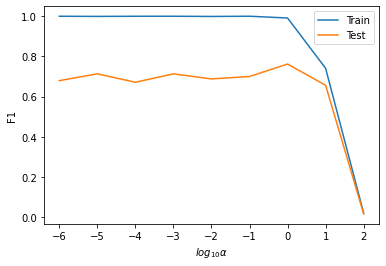

In [86]:
scorea=np.zeros((9,2))
for i in range(-6,3):
    alphav=10**i
    mlp = sklearn.neural_network.MLPClassifier(activation='relu',hidden_layer_sizes=((10,10)),max_iter=3500,alpha=alphav)
    mlp.fit(x_train,y_train)
    scorea[i+6,0]=sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro')
    scorea[i+6,1]=sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro')
plt.plot(range(-6,3),scorea[:,0])
plt.plot(range(-6,3),scorea[:,1])
plt.legend(['Train','Test'])
plt.xlabel(r'$log_{10} \alpha$')
plt.ylabel('F1')

In [ ]:
#Se observa que con una arquitectura diferente para la red neuronal se obtienen mejores resultados